# HW 4 coding part

Due 11/08/2020

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor as gbr
import matplotlib.pyplot as plt

We have imported the sklearn.ensemble package for boosting. But generally I've found the xgboost implementation to be amazing. However, that would take installing an additional package and I don't want to impose that on anybody.

# Boosting

In [ ]:
n=100
sig=0.5
x = 4*np.random.rand(n,1)
y = np.sin(x[:,0]*4)+sig*np.random.randn(n)
xtest = np.arange(0,4,0.01)[:,None] ##adding dummy dimension for sklearn method
ytest = np.sin(4*xtest[:,0]) + sig*np.random.randn(xtest.shape[0])

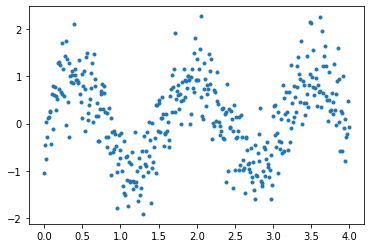

In [ ]:
plt.plot(xtest,ytest,'.')

## setting params

We will set our parameters in a dictionary. A dictionary is a key, value pair in python. Keys can be an hashable type: e.g. numbers, strings, tuples, but not lists.

In [ ]:
# {(1,[2]):1}

In [ ]:
params = {'n_estimators': 1000,
          'max_depth': 7,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
params['max_depth']

7

In [ ]:
reg = gbr(**params) ##can pass keyword parameters as a dictionary using **

In [ ]:
reg.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
reg.loss_(ytest,reg.predict(xtest))

0.4766472346792215

In [ ]:
np.linalg.norm(ytest-reg.predict(xtest))**2/ytest.shape[0]

0.47664723467922165

We can plot the training and test error as iterations vary.

In [ ]:
test_mse_iteration = [reg.loss_(ytest,ypred) for ypred in reg.staged_predict(xtest)]

In [ ]:
train_mse_iteration = [reg.loss_(y,ypred) for ypred in reg.staged_predict(x)]

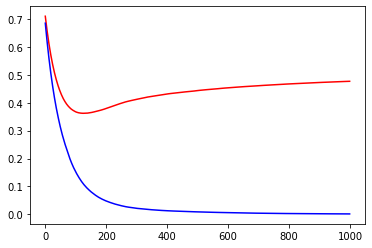

In [ ]:
plt.plot(test_mse_iteration,'red')
plt.plot(train_mse_iteration,'blue')

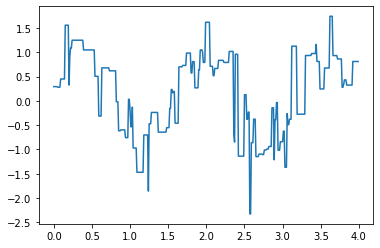

In [ ]:
plt.plot(xtest,reg.predict(xtest))

# Problem 1

Without retraining, what is the test error for our learned function after $42$ trees are added to the boosted tree?

Reminder:

In [ ]:
reg.loss_(ytest,reg.predict(xtest))

0.4766472346792215

In [ ]:
something_here=41 #??
test_mse_iteration[something_here]

0.46409685439512544

# Problem 2

Now we will produce similar plots for different values of the learning rate

In [ ]:
learning_rate_list = [0.005,0.01,0.05,0.1,0.5]

In [ ]:
newplot = [] ##format should be that each entry is a tuple (test_error,train_error)
for lr in learning_rate_list:
    params['learning_rate'] = lr ##fill your answer
    reg = gbr(**params)
    reg.fit(x,y)
    test_error = [reg.loss_(ytest,ypred) for ypred in reg.staged_predict(xtest)]
    train_error = [reg.loss_(y,ypred) for ypred in reg.staged_predict(x)]
    newplot.append((test_error, train_error)) #??

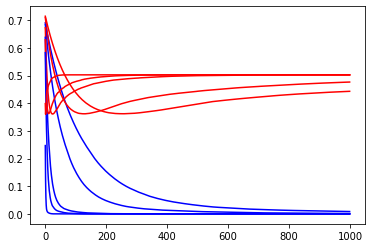

In [ ]:
for k in newplot:
    plt.plot(k[0],'red')
    plt.plot(k[1],'blue')

## What do you observe?

In the plot above I observe that as the train error approaches zero, the test error also starts to lower. However, the lowest value seems to only be around 0.4 for the test error, whereas the train error is close to 0. This could be overfitting the data, as the model performs very well on the training data, but on the test data it doesn't seem to perform extremely well.

# Problem 3

In this problem we will use 5-fold cross validation to pick the tree depth

In [ ]:
tree_depth_choices = np.arange(1,9)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def cvfunc(x,y,params,folds=5):
    """
    x is the data: x.shape=(num_rows,num_dimensions)
    y is value: y.shape=(num_rows,)
    params is a dictionary of the parameters
    """
    kf = KFold(n_splits=folds,shuffle=True) ##default for shuffle is False, depends on your situation if you need it
    kf.get_n_splits(x)
    cv_error = list()
    for train_index, test_index in kf.split(x):
        reg = gbr(**params)
        reg.fit(x[train_index],y[train_index])
        cv_error.append(reg.loss_(y[test_index],reg.predict(x[test_index])) * len(test_index) / len(x))
    return np.sum(cv_error) ##but the correct answer here

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 7,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
tree_error = list()
for treedepth in tree_depth_choices:
    params['max_depth']=treedepth
    tree_error.append(cvfunc(x,y,params))

In [ ]:
best_tree = tree_depth_choices[np.argmin(tree_error)]

In [ ]:
params['max_depth']=best_tree

In [ ]:
true_tree_error=list()
for treedepth in tree_depth_choices:
    params['max_depth'] = treedepth
    reg = gbr(**params)
    reg.fit(x,y)
    true_tree_error.append(reg.loss_(ytest,reg.predict(xtest)))

## Plot the cv error and the true tree error on the same plot against tree_depth_choices

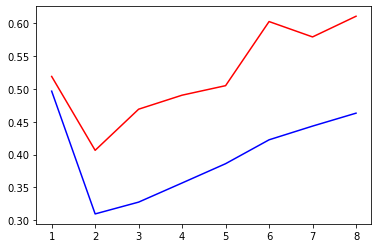

In [ ]:
plt.plot(tree_depth_choices,tree_error,color='red')
plt.plot(tree_depth_choices,true_tree_error,color='blue')

I won't assign this, but try the same exercise using the MIST dataset, or your favoriate dataset. Also, I suggest experimenting with the dataset we generated above and vary the noise level as well as the number of observations to get a sense of the types of functions boosting will learn.